In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

### 从yfinance中获取yahoo的股票数据并且分析处理:

In [2]:
spy = yf.download("spy", start="2010-01-01",end="2017-01-01")
spy

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,87.483208,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.714790,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.776512,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,88.147057,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,88.440376,126402800
...,...,...,...,...,...,...
2016-12-23,225.429993,225.720001,225.210007,225.710007,201.048386,36697800
2016-12-27,226.020004,226.729996,226.000000,226.270004,201.547119,42672500
2016-12-28,226.570007,226.589996,224.270004,224.399994,199.881470,64095000


Text(0.5, 1.0, 'SPY')

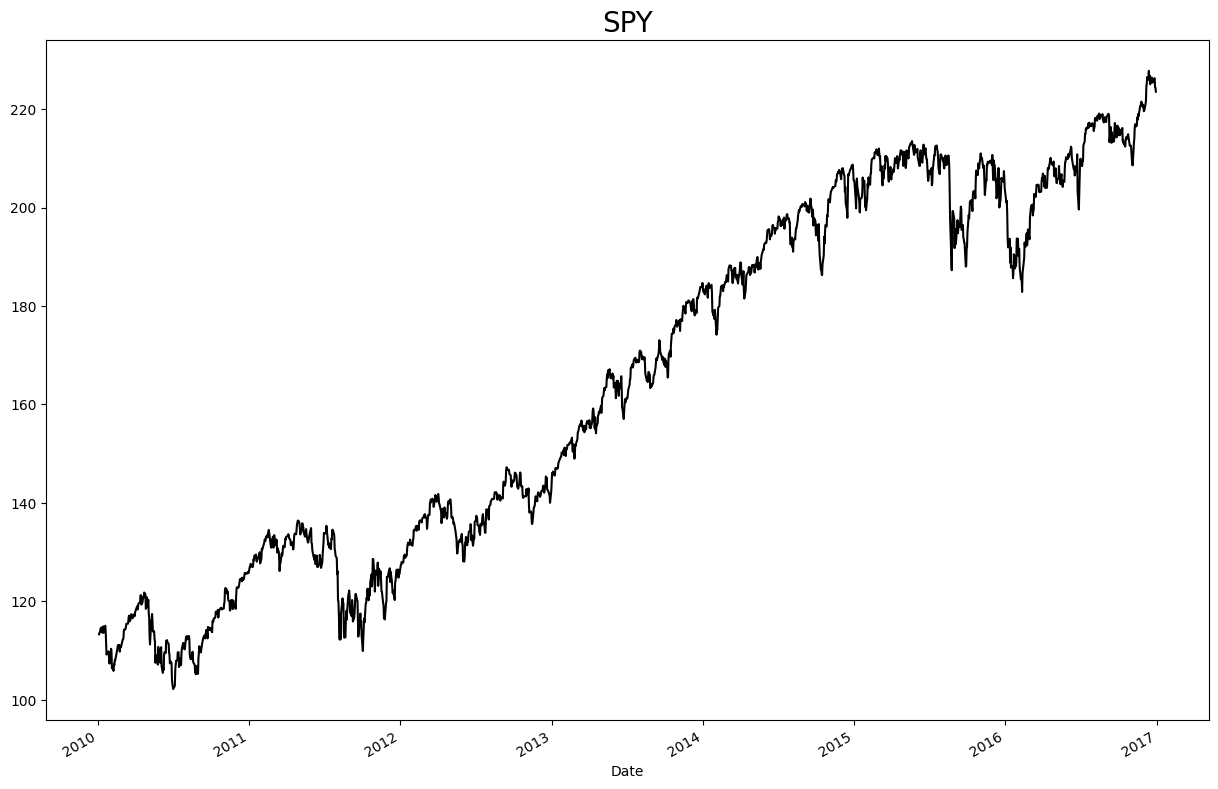

In [3]:
#绘制收盘价的折线图
spy_c=spy['Close']
fig,ax=plt.subplots(figsize=(15,10))
spy_c.plot(color='k')
plt.title("SPY", fontsize=20)

In [4]:
#首个开盘价
first_open=spy['Open'].iloc[0]
first_open

112.37000274658203

In [5]:
#最后一天的收盘价
last_close = spy['Close'].iloc[-1]
last_close

223.52999877929688

In [6]:
#整个时期的变化
last_close - first_open

111.15999603271484

In [7]:
#添加每日盘中收益
spy['Daily Change']=pd.Series(spy['Close']-spy['Open'])
spy['Daily Change']

Date
2010-01-04    0.959999
2010-01-05    0.369995
2010-01-06    0.190002
2010-01-07    0.690002
2010-01-08    0.680000
                ...   
2016-12-23    0.280014
2016-12-27    0.250000
2016-12-28   -2.170013
2016-12-29   -0.129990
2016-12-30   -1.199997
Name: Daily Change, Length: 1762, dtype: float64

In [8]:
#查看这段时间变化的总和
spy['Daily Change'].sum()

73.64010620117188

In [9]:
import numpy as np

In [10]:
#计算盘中交易的标准差
np.std(spy['Daily Change'])

1.1397004258512753

In [11]:
#计算隔夜交易的标准差
spy['Overnight Change']=pd.Series(spy['Open']-spy['Close']).shift(1)
np.std(spy['Overnight Change'])

1.139639636848668

In [12]:
#下跌交易日的变化
spy[spy['Daily Change']<0]['Daily Change'].mean()

-0.8874427424672314

In [13]:
#下跌交易日的隔夜变化
spy[spy['Overnight Change']<0]['Overnight Change'].mean()

-0.7921778439737326

In [14]:
#daily_rtn：每日回报，id_rtn：盘中回报，on_rtn：隔夜回报
daily_rtn=((spy['Close']-spy['Close'].shift(1))/spy['Close'].shift(1))*100
id_rtn=((spy['Close']-spy['Open']))/spy['Open']*100
on_rtn = ((spy['Open'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100
daily_rtn

Date
2010-01-04         NaN
2010-01-05    0.264710
2010-01-06    0.070406
2010-01-07    0.422129
2010-01-08    0.332776
                ...   
2016-12-23    0.146420
2016-12-27    0.248105
2016-12-28   -0.826451
2016-12-29   -0.022276
2016-12-30   -0.365504
Name: Close, Length: 1762, dtype: float64

In [15]:
#输出各类指标，
def get_stats(s,n=252):
  s=s.dropna()
  wins=len(s[s>0])
  losses = len(s[s<0])
  evens=len(s[s==0])
  mean_w=round(s[s>0].mean(),3)
  mean_l=round(s[s<0].mean(),3)
  win_r=round(wins/losses,3)
  mean_trd=round(s.mean(),3)
  sd=round(np.std(s),3)
  max_l = round(s.min(), 3)
  max_w = round(s.max(), 3)
  sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
  cnt=len(s)
  print('Trades:', cnt,'\nWins:', wins,'\nLosses:', losses,'\nBreakeven:', evens,'\nWin/Loss Ratio', win_r,'\nMean Win:', mean_w,'\nMean Loss:', mean_l,'\nMean', mean_trd,'\nStd Dev:', sd,'\nMax Loss:', max_l,'\nMax Win:', max_w,'\nSharpe Ratio:', sharpe_r)

* 能发现买入并持有一天的平均回报率最高以及回报率标准差最高
* 隔夜策略和盘中策略有着几乎相同的平均回报，其波动性明显较小

In [16]:
get_stats(daily_rtn)

Trades: 1761 
Wins: 960 
Losses: 794 
Breakeven: 7 
Win/Loss Ratio 1.209 
Mean Win: 0.667 
Mean Loss: -0.71 
Mean 0.043 
Std Dev: 0.975 
Max Loss: -6.512 
Max Win: 4.65 
Sharpe Ratio: 0.7058


In [17]:
get_stats(id_rtn)

Trades: 1762 
Wins: 969 
Losses: 782 
Breakeven: 11 
Win/Loss Ratio 1.239 
Mean Win: 0.503 
Mean Loss: -0.562 
Mean 0.027 
Std Dev: 0.733 
Max Loss: -4.175 
Max Win: 3.683 
Sharpe Ratio: 0.59


In [18]:
get_stats(on_rtn)

Trades: 1761 
Wins: 926 
Losses: 817 
Breakeven: 18 
Win/Loss Ratio 1.133 
Mean Win: 0.404 
Mean Loss: -0.422 
Mean 0.016 
Std Dev: 0.608 
Max Loss: -5.227 
Max Win: 4.09 
Sharpe Ratio: 0.4268


In [ ]:
##### 拉取自2000 年开始的数据

In [19]:
sp = yf.download("spy", start="2000-01-01",end="2017-01-01")

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY')

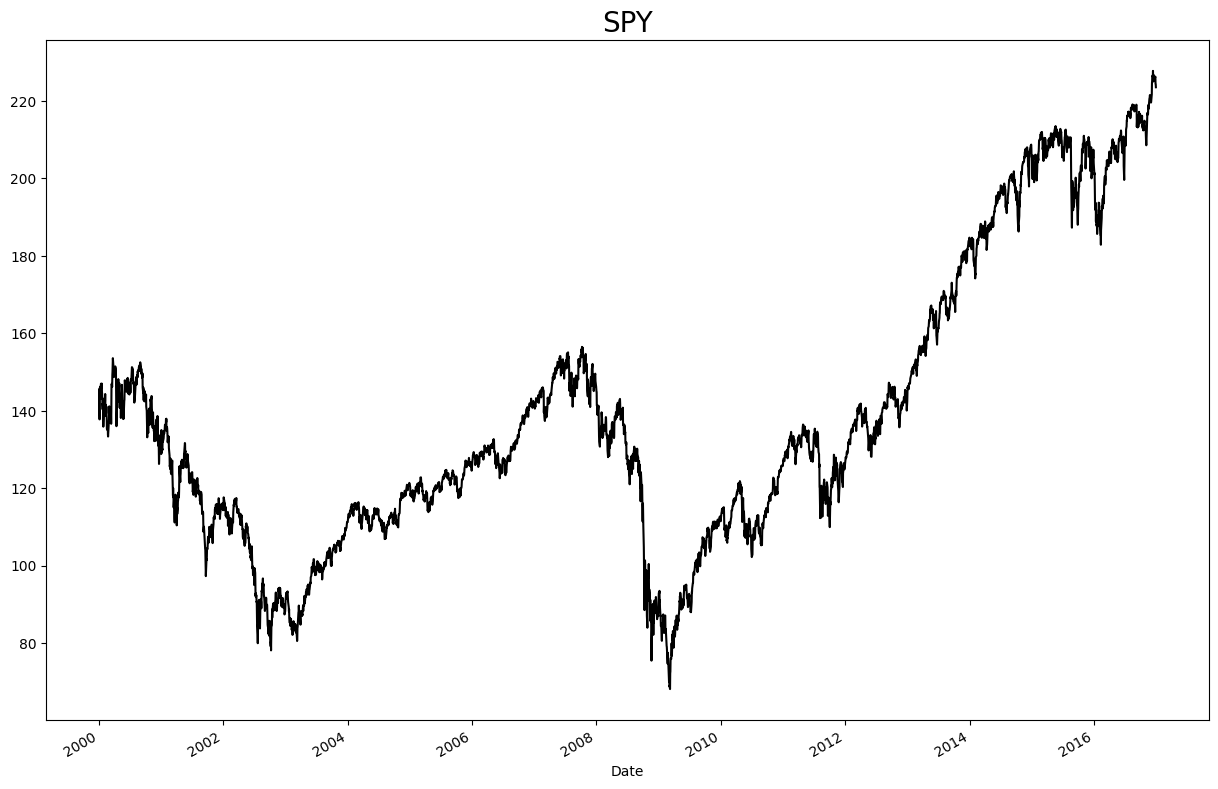

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sp['Close'].plot(color='k')
plt.title("SPY", fontsize=20)

In [21]:
#获取三个基本策略的基准线
long_day_rtn = ((sp['Close'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100
long_id_rtn = ((sp['Close'] - sp['Open'])/sp['Open'])*100
long_on_rtn = ((sp['Open'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [22]:
#每日回报总体数据，统计数据
print((sp['Close'] - sp['Close'].shift(1)).sum() )
get_stats(long_day_rtn)

78.09249877929688
Trades: 4276 
Wins: 2284 
Losses: 1976 
Breakeven: 16 
Win/Loss Ratio 1.156 
Mean Win: 0.802 
Mean Loss: -0.889 
Mean 0.018 
Std Dev: 1.252 
Max Loss: -9.845 
Max Win: 14.52 
Sharpe Ratio: 0.2267


In [23]:
#盘中回报总体数据，统计数据
print((sp['Close'] - sp['Open']).sum())
get_stats(long_id_rtn)

-6.6303863525390625
Trades: 4277 
Wins: 2246 
Losses: 2001 
Breakeven: 30 
Win/Loss Ratio 1.122 
Mean Win: 0.671 
Mean Loss: -0.747 
Mean 0.003 
Std Dev: 1.032 
Max Loss: -8.991 
Max Win: 8.435 
Sharpe Ratio: 0.0475


In [24]:
#隔夜回报，统计数据
print((sp['Open'] - sp['Close'].shift(1)).sum() )
get_stats(long_on_rtn)

81.91038513183594
Trades: 4276 
Wins: 2257 
Losses: 1975 
Breakeven: 44 
Win/Loss Ratio 1.143 
Mean Win: 0.428 
Mean Loss: -0.459 
Mean 0.014 
Std Dev: 0.685 
Max Loss: -8.322 
Max Win: 6.068 
Sharpe Ratio: 0.3292


#### 使用支持向量回归，构建模型

使用股票的前一天的收盘价值来预测第二天的收盘价

In [25]:
#为包含每一天价格的历史记录设置 DataFrame 对象
for i in range(1,21,1):
  sp.loc[:,'Close Minus '+str(i)]=sp['Close'].shift(i)
sp20=sp[[x for x in sp.columns if 'Close Minus' in x or x=='Close']].iloc[20:,]
sp20

,Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,...,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,...,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500
2000-02-02,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,...,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000
2000-02-03,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,...,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000
2000-02-04,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,...,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000
2000-02-07,142.375000,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,...,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,225.710007,225.380005,225.770004,226.399994,225.529999,225.039993,226.809998,225.880005,227.759995,226.250000,...,225.149994,224.600006,221.699997,221.000000,219.679993,219.570007,220.380005,220.910004,220.479996,221.520004
2016-12-27,226.270004,225.710007,225.380005,225.770004,226.399994,225.529999,225.039993,226.809998,225.880005,227.759995,...,226.509995,225.149994,224.600006,221.699997,221.000000,219.679993,219.570007,220.380005,220.910004,220.479996
2016-12-28,224.399994,226.270004,225.710007,225.380005,225.770004,226.399994,225.529999,225.039993,226.809998,225.880005,...,226.250000,226.509995,225.149994,224.600006,221.699997,221.000000,219.679993,219.570007,220.380005,220.910004


In [26]:
#颠倒顺序
sp20 = sp20.iloc[:,::-1]
sp20

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,...,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,145.437500,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,...,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500
2000-02-02,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,...,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500
2000-02-03,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,...,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500
2000-02-04,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,...,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750
2000-02-07,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,...,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750,142.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,221.520004,220.479996,220.910004,220.380005,219.570007,219.679993,221.000000,221.699997,224.600006,225.149994,...,226.250000,227.759995,225.880005,226.809998,225.039993,225.529999,226.399994,225.770004,225.380005,225.710007
2016-12-27,220.479996,220.910004,220.380005,219.570007,219.679993,221.000000,221.699997,224.600006,225.149994,226.509995,...,227.759995,225.880005,226.809998,225.039993,225.529999,226.399994,225.770004,225.380005,225.710007,226.270004
2016-12-28,220.910004,220.380005,219.570007,219.679993,221.000000,221.699997,224.600006,225.149994,226.509995,226.250000,...,225.880005,226.809998,225.039993,225.529999,226.399994,225.770004,225.380005,225.710007,226.270004,224.399994


In [27]:
#导入支持向量机
from sklearn.svm import SVR

In [28]:
#设置训练和测试矩阵，以及每个数据点的目标向量,设置后1000条为测试数据
clf=SVR(kernel='linear')
X_train = sp20[:-1000]
y_train = sp20['Close'].shift(-1)[:-1000]
X_test = sp20[-1000:]
y_test = sp20['Close'].shift(-1)[-1000:]

In [29]:
#拟合模型，预测测试集
model=clf.fit(X_train,y_train)
preds=model.predict(X_test)

In [30]:
tf=pd.DataFrame(list(zip(y_test, preds)), columns=['Next Day Close','Predicted Next Close'], index=y_test.index)
tf

,Next Day Close,Predicted Next Close
Date,,
2013-01-14,147.070007,146.985708
2013-01-15,147.050003,147.074056
2013-01-16,148.000000,147.069861
2013-01-17,148.330002,148.337298
2013-01-18,149.130005,148.380585
...,...,...
2016-12-23,226.270004,225.897594
2016-12-27,224.399994,226.488622
2016-12-28,224.350006,224.702627


In [31]:
#向 DataFrame 对象添加一些额外的数据点来计算结果
cdc = sp[['Close']].iloc[-1000:]
ndo = sp[['Open']].iloc[-1000:].shift(-1)
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2013-01-14,147.070007,146.985708,146.970001,146.289993
2013-01-15,147.050003,147.074056,147.070007,146.770004
2013-01-16,148.000000,147.069861,147.050003,147.699997
2013-01-17,148.330002,148.337298,148.000000,147.970001
2013-01-18,149.130005,148.380585,148.330002,148.330002
...,...,...,...,...
2016-12-23,226.270004,225.897594,225.710007,226.020004
2016-12-27,224.399994,226.488622,226.270004,226.570007
2016-12-28,224.350006,224.702627,224.399994,224.479996


In [32]:
#收益以及亏损信号量
def get_signal(r):
  if r['Predicted Next Close'] > r['Next Day Open']:
    return 1
  else:
    return 0
def get_ret(r):
   if r['Signal'] == 1:
    return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
   else:
    return 0

In [33]:
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))
tf2.dropna()


,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2013-01-14,147.070007,146.985708,146.970001,146.289993,1,0.533197
2013-01-15,147.050003,147.074056,147.070007,146.770004,1,0.190774
2013-01-16,148.000000,147.069861,147.050003,147.699997,0,0.000000
2013-01-17,148.330002,148.337298,148.000000,147.970001,1,0.243293
2013-01-18,149.130005,148.380585,148.330002,148.330002,1,0.539340
...,...,...,...,...,...,...
2016-12-22,225.710007,225.761399,225.380005,225.429993,1,0.124213
2016-12-23,226.270004,225.897594,225.710007,226.020004,0,0.000000
2016-12-27,224.399994,226.488622,226.270004,226.570007,0,0.000000


In [34]:
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

20.029983520507812

In [35]:
(sp['Close'].iloc[-1000:] - sp['Open'].iloc[-1000:]).sum()

55.37005615234375

In [36]:
get_stats((sp['Close'].iloc[-1000:] - sp['Open'].iloc[-1000:])/sp['Open'].iloc[-1000:] * 100)

Trades: 1000 
Wins: 551 
Losses: 444 
Breakeven: 5 
Win/Loss Ratio 1.241 
Mean Win: 0.443 
Mean Loss: -0.479 
Mean 0.031 
Std Dev: 0.629 
Max Loss: -4.175 
Max Win: 2.756 
Sharpe Ratio: 0.7927


In [37]:
get_stats(tf2['PnL'])

Trades: 1000 
Wins: 275 
Losses: 242 
Breakeven: 483 
Win/Loss Ratio 1.136 
Mean Win: 0.468 
Mean Loss: -0.485 
Mean 0.011 
Std Dev: 0.46 
Max Loss: -2.135 
Max Win: 2.756 
Sharpe Ratio: 0.3918


In [38]:
#修改的信号量
def get_signal(r):
  if r['Predicted Next Close'] > r['Next Day Open']+1:
    return 1
  else:
    return 0
def get_ret(r):
   if r['Signal'] == 1:
    return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
   else:
    return 0

In [39]:
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

-8.100128173828125

In [40]:
get_stats(tf2['PnL'])

Trades: 1000 
Wins: 53 
Losses: 60 
Breakeven: 887 
Win/Loss Ratio 0.883 
Mean Win: 0.634 
Mean Loss: -0.613 
Mean -0.003 
Std Dev: 0.271 
Max Loss: -1.966 
Max Win: 2.756 
Sharpe Ratio: -0.1863


In [41]:
#反转信号量
def get_signal(r):
  if r['Predicted Next Close'] > r['Next Day Open']+1:
    return 0
  else:
    return 1
def get_ret(r):
   if r['Signal'] == 1:
    return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
   else:
    return 0

In [42]:
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()


63.39018249511719

In [43]:
get_stats(tf2['PnL'])

Trades: 999 
Wins: 497 
Losses: 384 
Breakeven: 118 
Win/Loss Ratio 1.294 
Mean Win: 0.423 
Mean Loss: -0.458 
Mean 0.035 
Std Dev: 0.567 
Max Loss: -4.175 
Max Win: 2.206 
Sharpe Ratio: 0.9671


In [44]:
#在不同的时期，重新运行模型
X_train = sp20[:-2000]
y_train = sp20['Close'].shift(-1)[:-2000]
X_test = sp20[-2000:-1000]
y_test = sp20['Close'].shift(-1)[-2000:-1000]
model = clf.fit(X_train, y_train)
preds = model.predict(X_test)
tf = pd.DataFrame(list(zip(y_test, preds)), columns=['Next Day Close', 'Predicted Next Close'], index=y_test.index)
cdc = sp[['Close']].iloc[-2000:-1000]
ndo = sp[['Open']].iloc[-2000:-1000].shift(-1)
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']

In [45]:
def get_signal(r):
  if r['Predicted Next Close'] > r['Next Day Open'] + 1:
    return 0
  else:
    return 1
def get_ret(r):
  if r['Signal'] == 1:
    return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
  else:
    return 0

In [46]:
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))
tf2.dropna()
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

52.430091857910156

In [47]:
(sp['Close'].iloc[-2000:-1000] - sp['Open'].iloc[-2000:-1000]).sum()

38.39006042480469

In [48]:
get_stats(tf2['PnL'])

Trades: 999 
Wins: 500 
Losses: 388 
Breakeven: 111 
Win/Loss Ratio 1.289 
Mean Win: 0.631 
Mean Loss: -0.685 
Mean 0.05 
Std Dev: 0.86 
Max Loss: -4.625 
Max Win: 4.42 
Sharpe Ratio: 0.916


#### 动态时间规整模型


In [49]:
!sudo pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512708 sha256=af359eb8f2612955f285234e593aa4a1305fd1d8f3d23af3105dd0c8cfbcb9ed
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [50]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
def dtw_dist(x, y):
  distance, path = fastdtw(x, y, dist=euclidean)
  return distance

In [51]:
tseries = []
tlen = 5
for i in range(tlen, len(sp), tlen):
 pctc = sp['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100
 res = sp['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100
 tseries.append((pctc, res))

In [52]:
tseries[0]

(array([-3.91061453,  0.17889088, -1.60714286,  5.8076225 ]),
 0.34305317324185847)

In [53]:
len(tseries)

855

In [54]:
#获得每个序列相对于其他序列的距离度量
dist_pairs = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
      dist = dtw_dist(tseries[i][0].reshape(-1, 1), tseries[j][0].reshape(-1, 1))
      dist_pairs.append((i,j,dist,tseries[i][1], tseries[j][1]))

In [55]:
dist_pairs

[(0, 0, 0.0, 0.34305317324185847, 0.34305317324185847),
 (0, 1, 11.299043823861076, 0.34305317324185847, -0.7867318732723838),
 (0, 2, 15.47020515118639, 0.34305317324185847, 1.135604542418167),
 (0, 3, 8.30238819379867, 0.34305317324185847, 0.9852216748768461),
 (0, 4, 12.480347024543825, 0.34305317324185847, 1.3608428446005183),
 (0, 5, 7.475853496765062, 0.34305317324185847, 1.1312724014336917),
 (0, 6, 9.734974262391704, 0.34305317324185847, 1.1808288955776902),
 (0, 7, 10.986072034341387, 0.34305317324185847, 0.7276034561164213),
 (0, 8, 14.046474378754347, 0.34305317324185847, -0.12541329380914013),
 (0, 9, 15.286776353775679, 0.34305317324185847, 2.333028362305578),
 (0, 10, 13.661066655303223, 0.34305317324185847, 0.6074570590699713),
 (0, 11, 12.9651029804848, 0.34305317324185847, 0.10343400910219902),
 (0, 12, 11.010507847531992, 0.34305317324185847, -0.624479600333061),
 (0, 13, 12.54711169306082, 0.34305317324185847, -2.7425722002908826),
 (0, 14, 13.682102015079199, 0.3430

In [56]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist', 'A Ret', 'B Ret'])
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)
sfe = sf[sf['A']<sf['B']]

In [57]:
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)]
winf

,A,B,Dist,A Ret,B Ret
3484,4,69,0.778630,1.360843,-1.696072
3611,4,196,0.608312,1.360843,0.410596
3781,4,366,0.973128,1.360843,0.040522
3962,4,547,0.832545,1.360843,-1.447712
4063,4,648,0.548848,1.360843,-0.510458
...,...,...,...,...,...
716496,838,845,0.596990,0.302241,-0.335056
716497,838,846,0.510968,0.302241,-0.724539
716502,838,851,0.615455,0.302241,1.308078
721621,844,846,0.823709,0.626237,-0.724539


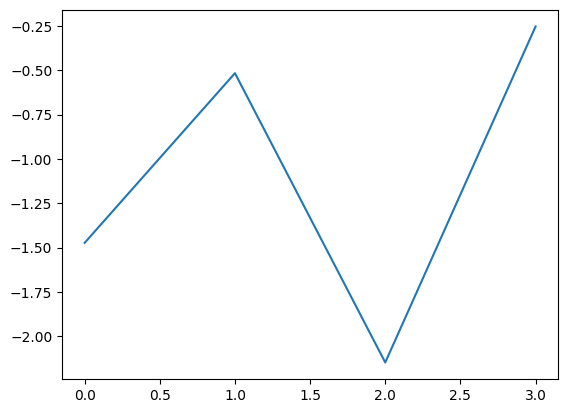

In [58]:
plt.plot(np.arange(4), tseries[6][0])

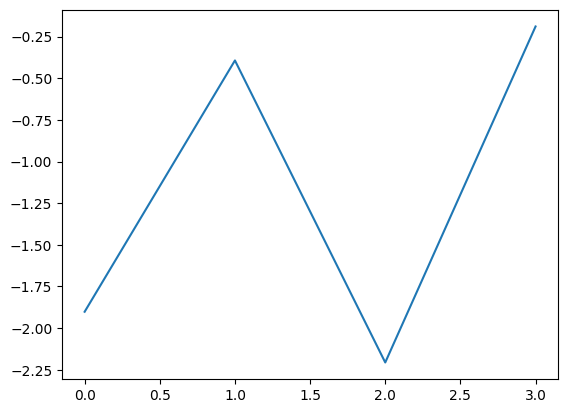

In [59]:
plt.plot(np.arange(4), tseries[598][0])

In [60]:
excluded = {}
return_list = []
def get_returns(r):
 if excluded.get(r['A']) is None:
  return_list.append(r['B Ret'])
 if r['B Ret'] < 0:
  excluded.update({r['A']:1})
winf.apply(get_returns, axis=1);

In [61]:
get_stats(pd.Series(return_list))

Trades: 601 
Wins: 367 
Losses: 234 
Breakeven: 0 
Win/Loss Ratio 1.568 
Mean Win: 0.564 
Mean Loss: -0.646 
Mean 0.093 
Std Dev: 0.82 
Max Loss: -3.591 
Max Win: 3.454 
Sharpe Ratio: 1.7955
